In [1]:
from sklearn import datasets, model_selection, naive_bayes
import numpy as np
import matplotlib.pyplot as plt 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Задание 2
## Наивный байесовский классификатор
### Загрузка данных и просмотр

In [2]:
digits = datasets.load_digits()
cancer = datasets.load_breast_cancer()

Сет **digits** состоит из полей data, images, target и target_names. В первых двух (в разных форматах) хранятся 64 признака, принимающие целочисленные значения от 0 до 16. Признак определяет яркость соответствующего пиксела в изображении 8х8.  Target -- номер категории, т.е. цифра.

Пример: 42 элемент -- это единица. 

In [3]:
print len(digits.data), digits.data[42]

1797 [  0.   0.   0.   0.  12.   5.   0.   0.   0.   0.   0.   2.  16.  12.   0.
   0.   0.   0.   1.  12.  16.  11.   0.   0.   0.   2.  12.  16.  16.  10.
   0.   0.   0.   6.  11.   5.  15.   6.   0.   0.   0.   0.   0.   1.  16.
   9.   0.   0.   0.   0.   0.   2.  16.  11.   0.   0.   0.   0.   0.   3.
  16.   8.   0.   0.]


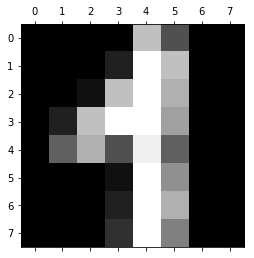

In [4]:
plt.gray() 
plt.matshow(digits.images[42]) 
plt.show()

In [5]:
print len(digits.target), digits.target[42]

1797 1


In [6]:
print len(digits.target_names), digits.target_names[1]

10 1


В **cancer** даются 30 числовых (рациональных неотрицательных) признаков, являющихся результатами 10 различных медицинских измерений, и 2 класса для классификации: malignat и benign

In [7]:
print len(cancer.feature_names), cancer.feature_names

30 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print len(cancer.data), cancer.data[42]

569 [  1.90700000e+01   2.48100000e+01   1.28300000e+02   1.10400000e+03
   9.08100000e-02   2.19000000e-01   2.10700000e-01   9.96100000e-02
   2.31000000e-01   6.34300000e-02   9.81100000e-01   1.66600000e+00
   8.83000000e+00   1.04900000e+02   6.54800000e-03   1.00600000e-01
   9.72300000e-02   2.63800000e-02   5.33300000e-02   7.64600000e-03
   2.40900000e+01   3.31700000e+01   1.77400000e+02   1.65100000e+03
   1.24700000e-01   7.44400000e-01   7.24200000e-01   2.49300000e-01
   4.67000000e-01   1.03800000e-01]


In [9]:
print len(cancer.target), cancer.target[42]

569 0


In [10]:
print len(cancer.target_names), cancer.target_names

2 ['malignant' 'benign']


### Сравнение классификаторов

In [11]:
def get_scores(x, y):
    estimators = [naive_bayes.BernoulliNB(), naive_bayes.MultinomialNB(), naive_bayes.GaussianNB()]
    scores = []
    for e in estimators:
        scores.append(np.mean(model_selection.cross_val_score(e, x, y)))
    return scores

Сет digits:

In [12]:
print zip(['Bernoulli', 'Multinomial', 'Gaussian'], get_scores(digits.data, digits.target))

[('Bernoulli', 0.82582365077805819), ('Multinomial', 0.87087714897350532), ('Gaussian', 0.81860038035501381)]


Максимальное качество 0.87 достигнуто мультиномиальным н.б. классификатором.

Сет cancer:

In [13]:
print zip(['Bernoulli', 'Multinomial', 'Gaussian'], get_scores(cancer.data, cancer.target))

[('Bernoulli', 0.62742040285899936), ('Multinomial', 0.89457904019307521), ('Gaussian', 0.9367492806089297)]


Максимальное качество 0.94 достигнуто гауссовским н.б. классификатором.

Ожидаемо плохо себя показал классификатор с бернуллиевским распределением. Действительно, признаки в данных задачах не являются бинарными по своей природе. Впрочем, в случае рукописных цифр бинаризация сработала хорошо и обоснована логически (есть черта / нет черты).

Таким образом, *а* и *b* неверны, *с* верно (признаки в digits -- целые неотрицательные от 0 до 16), *d* верно (признаки в cancer -- вещественные и, как правило, не целые).

